In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
df = pd.read_csv('all_games.csv', encoding='ISO-8859-1', sep=',', header=0, names=['Name','Platform','Release Date','Summary','Meta Score','User Review'])
df.head(10)

,Name,Platform,Release Date,Summary,Meta Score,User Review
0,Full Throttle,PC,"April 30, 1995","You're Ben--beaten, framed for murder and left...",86,8.6
1,Duke Nukem 3D,PC,"January 29, 1996",Prepare yourself for the ultimate 3D Slugfest....,89,8.7
2,Sid Meier's Civilization II,PC,"February 29, 1996",An empire-building turn-based strategy game. T...,94,8.8
3,Bad Mojo,PC,"February 29, 1996",Roger was about to do something bad. Unfortuna...,74,6.9
4,Resident Evil,PlayStation,"March 30, 1996",Raccoon City has been completely overrun by mu...,91,9.1
5,Quake,PC,"June 22, 1996",Rage through 32 single player levels and 6 dea...,94,8.8
6,Time Commando,PC,"July 31, 1996",A deadly virus has invaded the military's top ...,80,8.3
7,Tekken 2,PlayStation,"August 25, 1996",More than a sequel. The undisputed #1 fighting...,89,8.3
8,Super Mario 64,Nintendo 64,"September 26, 1996",Mario is super in a whole new way! Combining t...,94,9.1
9,Pilotwings 64,Nintendo 64,"September 29, 1996",Forget about those other flying games. This is...,80,8.1


In [67]:
tdf = pd.DataFrame(df)
tdf

,Name,Platform,Release Date,Summary,Meta Score,User Review
0,Full Throttle,PC,"April 30, 1995","You're Ben--beaten, framed for murder and left...",86,8.6
1,Duke Nukem 3D,PC,"January 29, 1996",Prepare yourself for the ultimate 3D Slugfest....,89,8.7
2,Sid Meier's Civilization II,PC,"February 29, 1996",An empire-building turn-based strategy game. T...,94,8.8
3,Bad Mojo,PC,"February 29, 1996",Roger was about to do something bad. Unfortuna...,74,6.9
4,Resident Evil,PlayStation,"March 30, 1996",Raccoon City has been completely overrun by mu...,91,9.1
...,...,...,...,...,...,...
18795,Disco Elysium: The Final Cut,Switch,"October 12, 2021",Disco Elysium - The Final Cut is the definitiv...,87,8.7
18796,Demon Slayer: Kimetsu no Yaiba - The Hinokami ...,PlayStation 5,"October 13, 2021",Players can relive the story of Tanjiro Kamado...,72,7.5
18797,Crysis Remastered Trilogy,PlayStation 4,"October 15, 2021",The classic first person shooter from Crytek i...,74,tbd
18798,Demon Slayer: Kimetsu no Yaiba - The Hinokami ...,PlayStation 4,"October 15, 2021",Players can relive the story of Tanjiro Kamado...,72,tbd


In [72]:
tdf.size

112800

In [73]:
tdf.shape

(18800, 6)

In [367]:
tdf.describe()

,Meta Score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


In [75]:
tdf.dtypes

Name            object
Platform        object
Release Date    object
Summary         object
Meta Score       int64
User Review     object
dtype: object

In [76]:
df.dtypes.value_counts()

object    5
int64     1
dtype: int64

In [52]:
df['Platform'].unique()

array([' PC', ' PlayStation', ' Nintendo 64', ' Wii', ' PlayStation 2',
       ' Dreamcast', ' PlayStation 4', ' Game Boy Advance', ' Xbox 360',
       ' PSP', ' Xbox', ' PlayStation 3', ' Switch', ' Wii U', ' DS',
       ' PlayStation Vita', ' 3DS', ' Xbox One', ' GameCube',
       ' Xbox Series X', ' Stadia', ' PlayStation 5'], dtype=object)

In [53]:
df['Platform'].value_counts()

 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: Platform, dtype: int64

In [243]:
((df['Platform'].value_counts()/df['Platform'].value_counts().sum())*100).round(2)

 PC                  25.87
 PlayStation 4       10.94
 Xbox 360             8.74
 PlayStation 2        7.52
 Switch               7.44
 PlayStation 3        6.68
 Xbox One             6.27
 Xbox                 4.20
 DS                   3.83
 Wii                  3.48
 PSP                  2.72
 GameCube             2.38
 Game Boy Advance     2.33
 3DS                  2.11
 PlayStation Vita     1.37
 PlayStation          0.99
 Wii U                0.98
 Dreamcast            0.66
 PlayStation 5        0.66
 Xbox Series X        0.41
 Nintendo 64          0.38
 Stadia               0.03
Name: Platform, dtype: float64

<AxesSubplot:ylabel='Platform'>

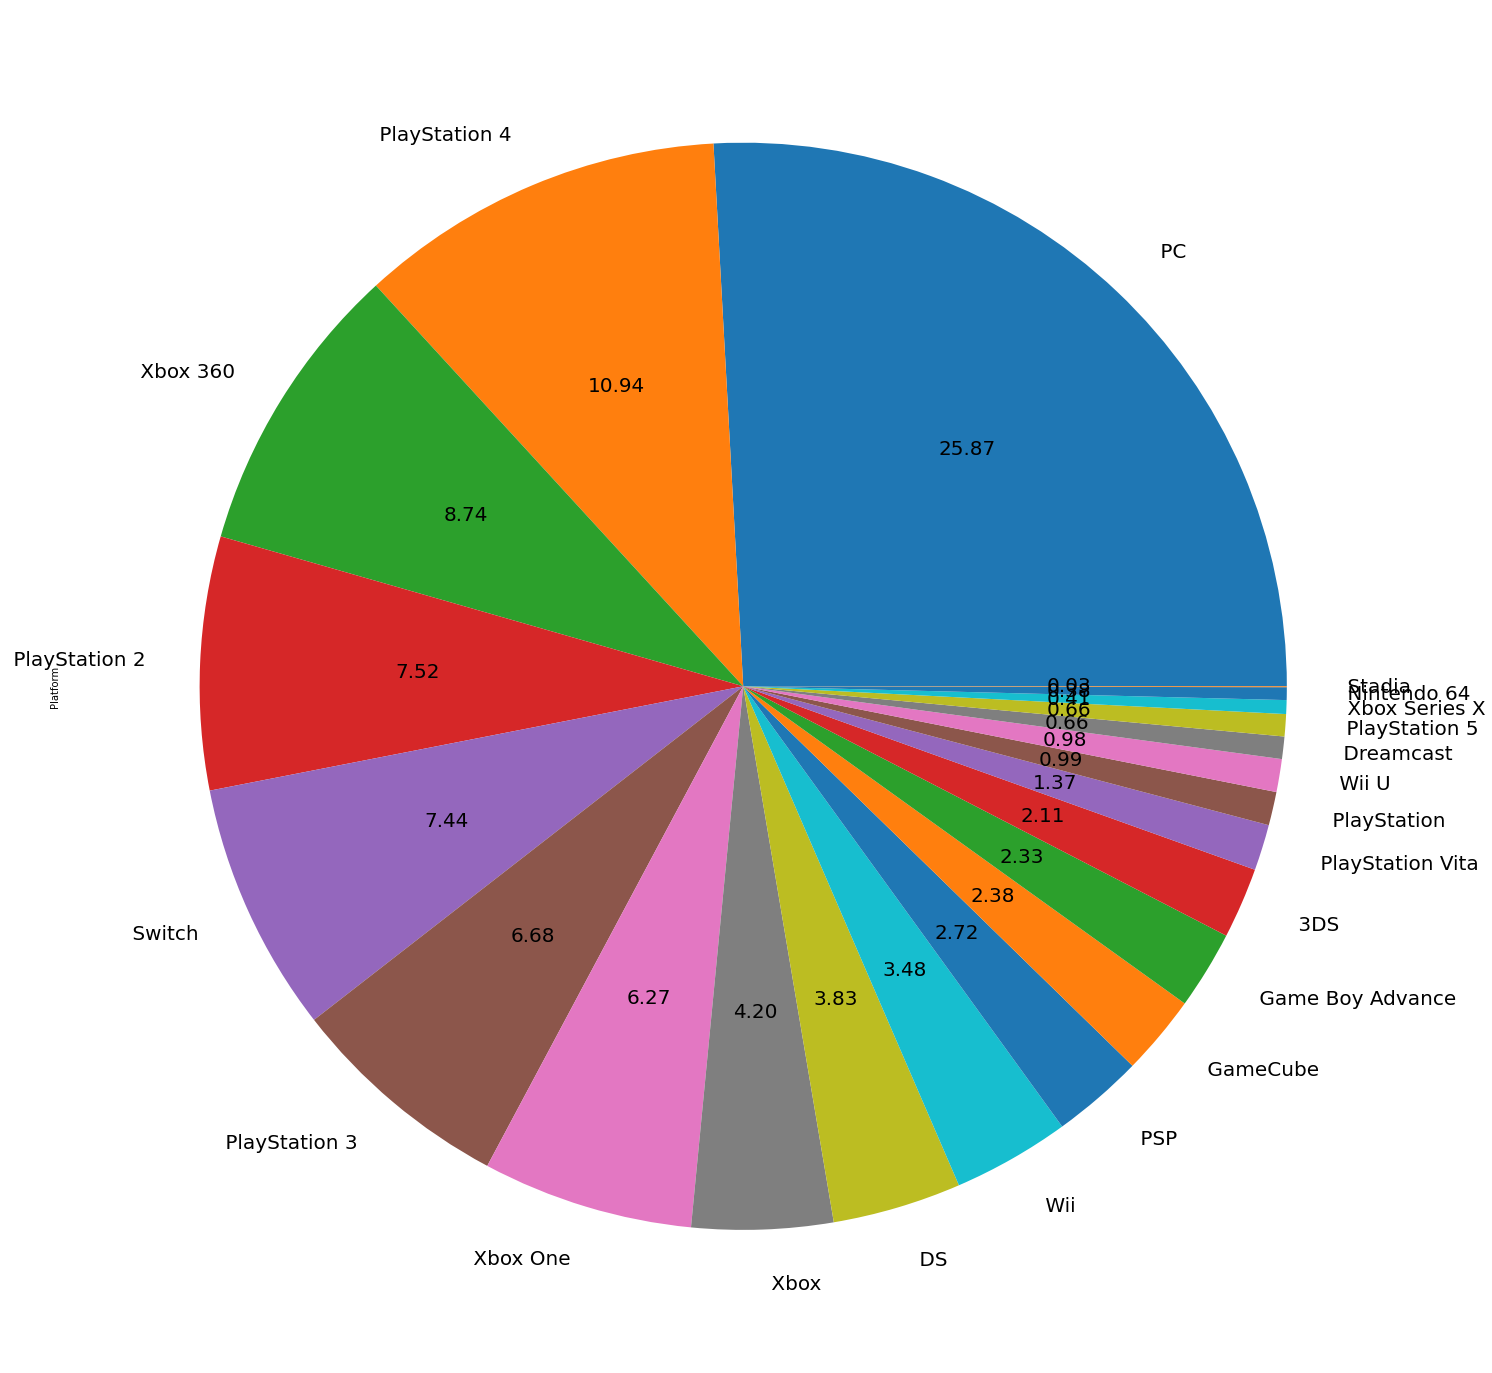

In [354]:
df['Platform'].value_counts().plot(kind='pie', autopct='%.2f', fontsize='20', figsize=(25,25))

Text(0, 0.5, 'Platform Name')

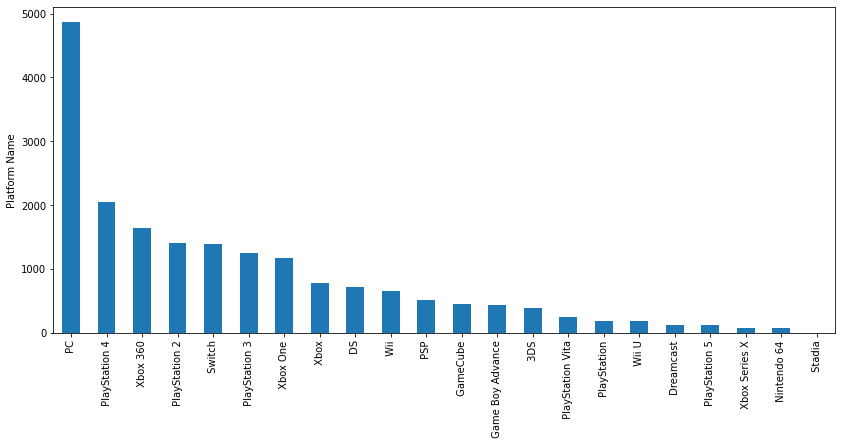

In [121]:
ax = df['Platform'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Platform Name')

<AxesSubplot:xlabel='Platform', ylabel='Meta Score'>

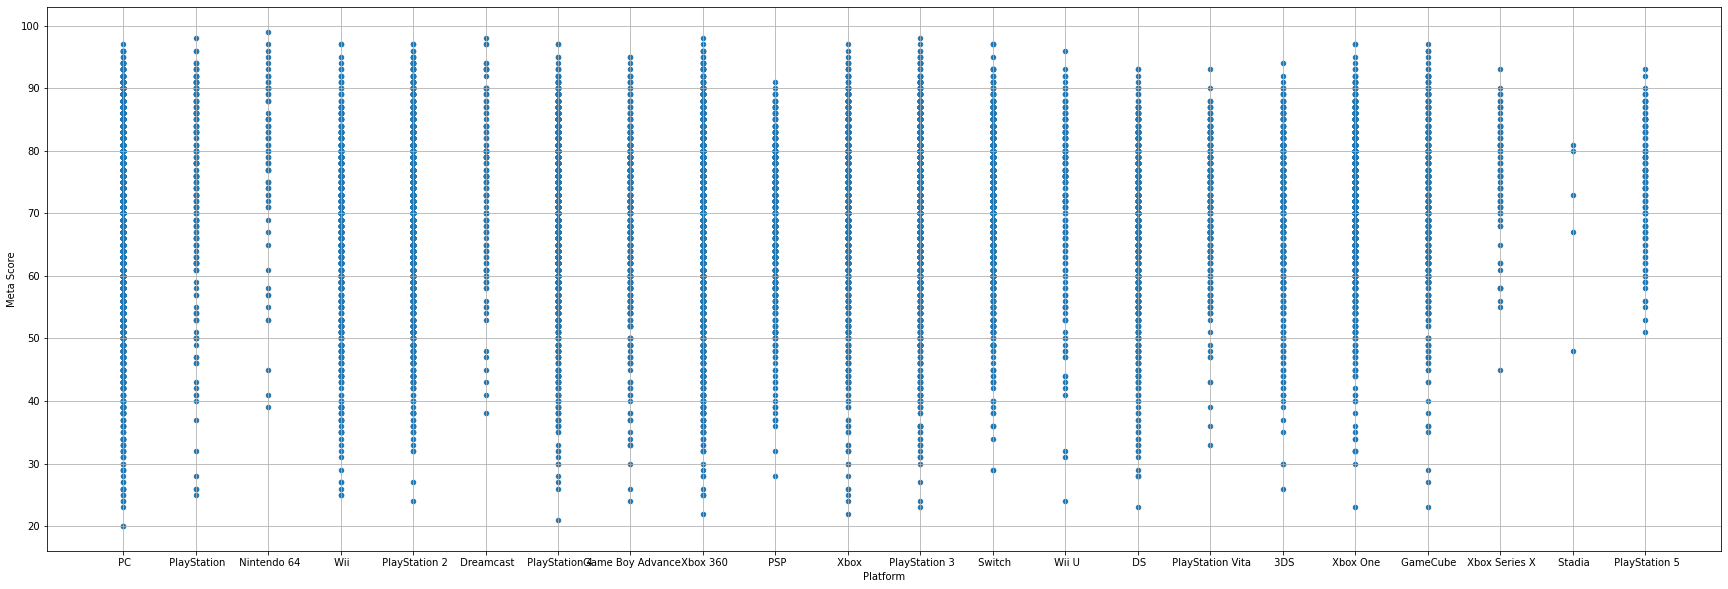

In [268]:
df[['Platform','Meta Score']].plot(kind='scatter', x='Platform', y='Meta Score', figsize=(30,10), grid=True)

In [217]:
df['Platform Company'] = df['Platform'].replace({' PC':'PC',' PlayStation':'PlayStation',' PlayStation Vita':'PlayStation',' PlayStation 2':'PlayStation',' PlayStation 3':'PlayStation',' PlayStation 4':'PlayStation',' PlayStation 5':'PlayStation',' PSP':'PlayStation',' Xbox':'Xbox',' Xbox 360':'Xbox',' Xbox One':'Xbox',' Xbox Series X':'Xbox',' Nintendo 64':'Nintendo',' DS':'Nintendo',' 3DS':'Nintendo',' Switch':'Nintendo',' Game Boy Advance':'Nintendo',' GameCube':'Nintendo',' Wii':'Nintendo',' Wii U':'Nintendo',' Stadia':'Google',' Dreamcast':'SEGA'})

In [ ]:
ndf=df['Platform'].replace({' PC':'PC',' PlayStation':'PlayStation',' PlayStation Vita':'PlayStation',' PlayStation 2':'PlayStation',' PlayStation 3':'PlayStation',' PlayStation 4':'PlayStation',' PlayStation 5':'PlayStation',' PSP':'PlayStation',' Xbox':'Xbox',' Xbox 360':'Xbox',' Xbox One':'Xbox',' Xbox Series X':'Xbox',' Nintendo 64':'Nintendo',' DS':'Nintendo',' 3DS':'Nintendo',' Switch':'Nintendo',' Game Boy Advance':'Nintendo',' GameCube':'Nintendo',' Wii':'Nintendo',' Wii U':'Nintendo',' Stadia':'Google',' Dreamcast':'SEGA'}).value_counts()
ndf

PlayStation    5806
PC             4864
Nintendo       4311
Xbox           3689
SEGA            125
Google            5
Name: Platform, dtype: int64

In [244]:
((ndf/ndf.sum())*100).round(2)

PlayStation    30.88
PC             25.87
Nintendo       22.93
Xbox           19.62
SEGA            0.66
Google          0.03
Name: Platform, dtype: float64

<AxesSubplot:ylabel='Platform'>

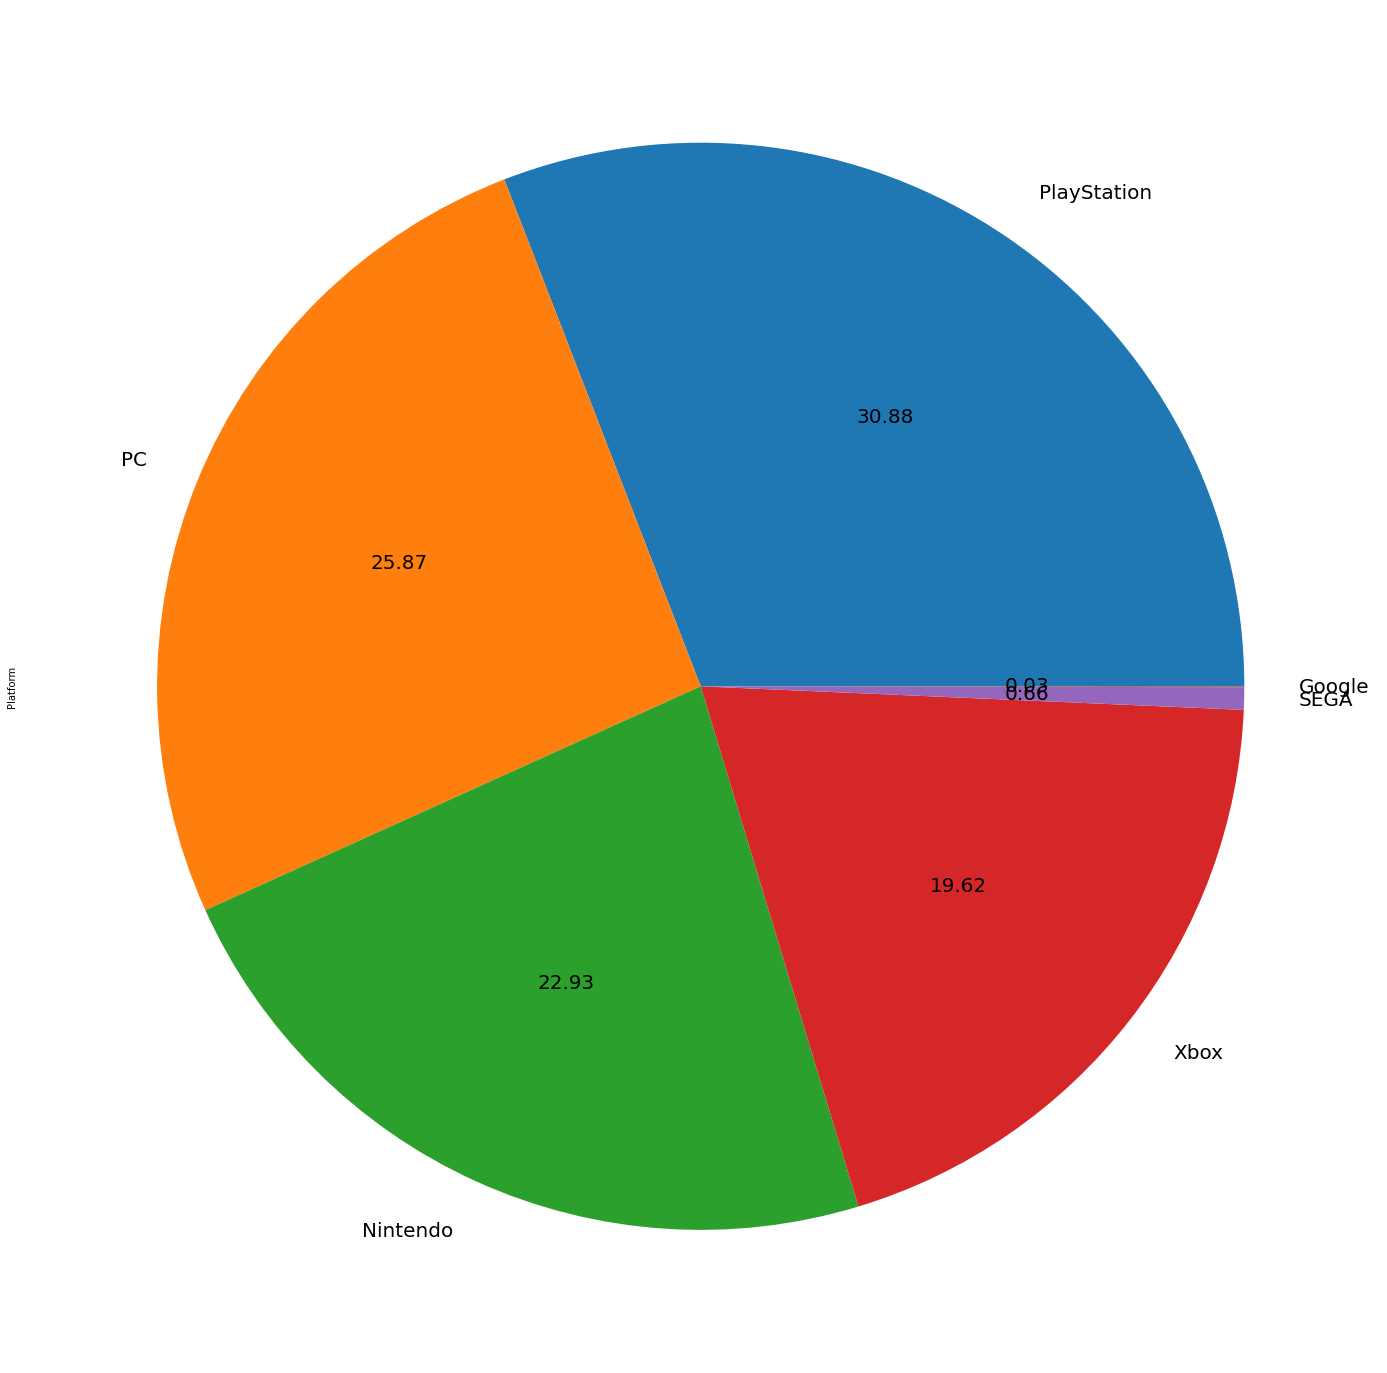

In [355]:
ndf.plot(kind='pie', autopct='%.2f', fontsize='20', figsize=(25,25))

Text(0, 0.5, 'True')

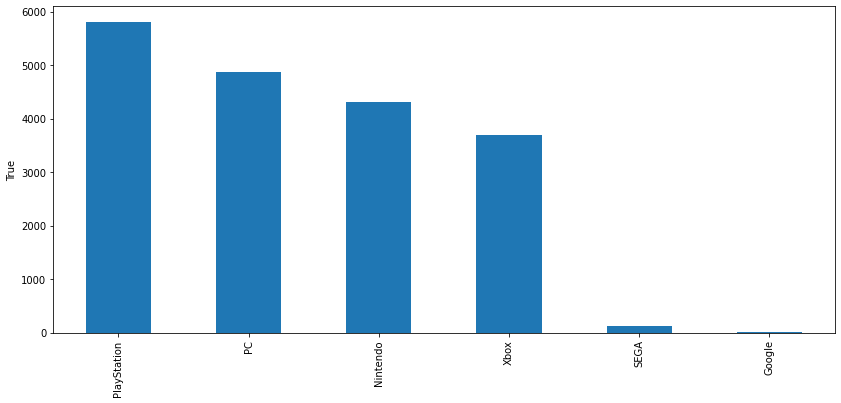

In [365]:
ax = ndf.plot(kind='bar', figsize=(14,6))
ax.set_ylabel(ndf.all())

In [136]:
df[['Platform','Meta Score']]

,Platform,Meta Score
0,PC,86
1,PC,89
2,PC,94
3,PC,74
4,PlayStation,91
...,...,...
18795,Switch,87
18796,PlayStation 5,72
18797,PlayStation 4,74
18798,PlayStation 4,72


count    18800.000000
mean        70.648883
std         12.225006
min         20.000000
25%         64.000000
50%         72.000000
75%         80.000000
max         99.000000
Name: Meta Score, dtype: float64

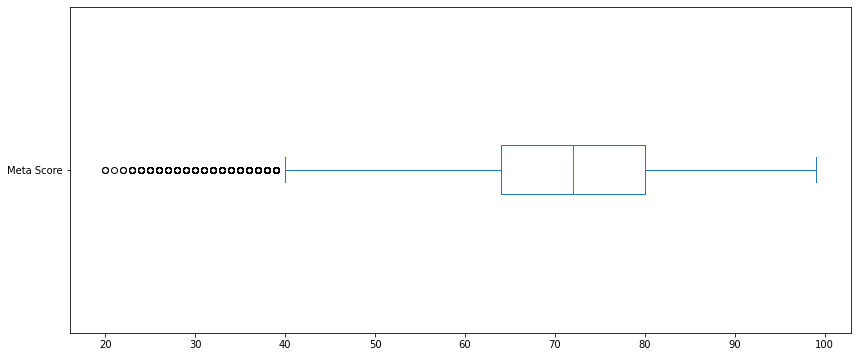

In [145]:
df['Meta Score'].plot(kind='box', vert=False, figsize=(14,6))
df['Meta Score'].describe()

Text(0, 0.5, 'Meta Score')

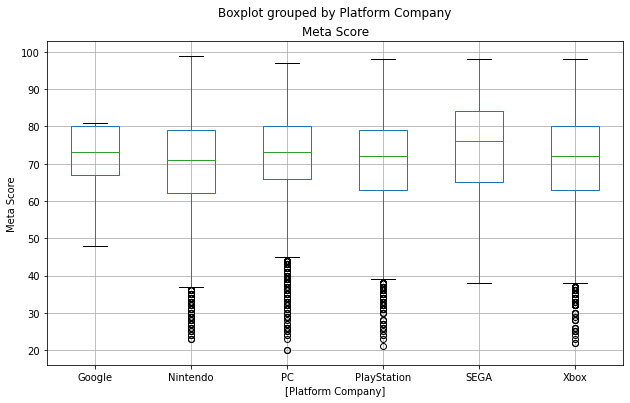

In [394]:
ax = df[['Meta Score', 'Platform Company']].boxplot(by='Platform Company', figsize=(10,6))
ax.set_ylabel('Meta Score')

<AxesSubplot:xlabel='Platform', ylabel='Meta Score'>

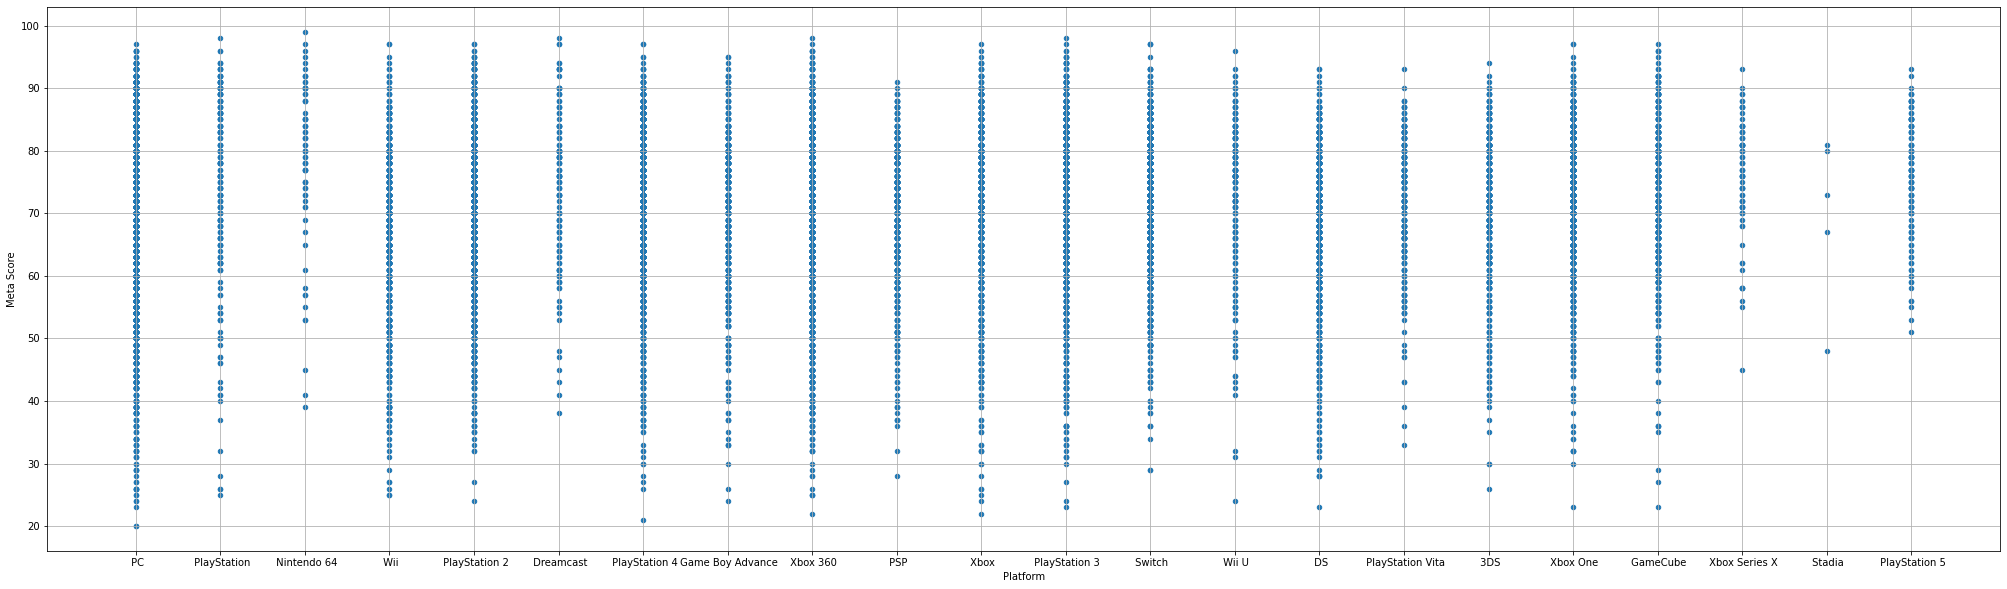

In [411]:
df[['Platform','Meta Score']].plot(kind='scatter', x='Platform', y='Meta Score', figsize=(35,10), grid=True)

In [371]:
df['User Review_float'] = pd.to_numeric(df[df['User Review']!='tbd']['User Review'])
pd.Series(df['User Review_float']).count()
rdf = df[pd.notnull(df['User Review_float'])]
rdf

,Name,Platform,Release Date,Summary,Meta Score,User Review,Platform Company,Release Year,Release Month,Release Date Format,User Review_float
0,Full Throttle,PC,"April 30, 1995","You're Ben--beaten, framed for murder and left...",86,8.6,PC,1995,April,1995-04-30,8.6
1,Duke Nukem 3D,PC,"January 29, 1996",Prepare yourself for the ultimate 3D Slugfest....,89,8.7,PC,1996,January,1996-01-29,8.7
2,Sid Meier's Civilization II,PC,"February 29, 1996",An empire-building turn-based strategy game. T...,94,8.8,PC,1996,February,1996-02-29,8.8
3,Bad Mojo,PC,"February 29, 1996",Roger was about to do something bad. Unfortuna...,74,6.9,PC,1996,February,1996-02-29,6.9
4,Resident Evil,PlayStation,"March 30, 1996",Raccoon City has been completely overrun by mu...,91,9.1,PlayStation,1996,March,1996-03-30,9.1
...,...,...,...,...,...,...,...,...,...,...,...
18792,Far Cry 6,PlayStation 5,"October 7, 2021",Far Cry 6 reveals a Caribbean island simmering...,74,4.8,PlayStation,2021,October,2021-10-07,4.8
18793,Tetris Effect: Connected,Switch,"October 8, 2021",Tetris Effect: Connected is the original Tetri...,95,8.5,Nintendo,2021,October,2021-10-08,8.5
18794,Metroid Dread,Switch,"October 8, 2021",Join intergalactic bounty hunter Samus Aran in...,89,8.8,Nintendo,2021,October,2021-10-08,8.8
18795,Disco Elysium: The Final Cut,Switch,"October 12, 2021",Disco Elysium - The Final Cut is the definitiv...,87,8.7,Nintendo,2021,October,2021-10-12,8.7


count    17435.000000
mean         6.990846
std          1.351554
min          0.200000
25%          6.300000
50%          7.300000
75%          7.900000
max          9.700000
Name: User Review_float, dtype: float64

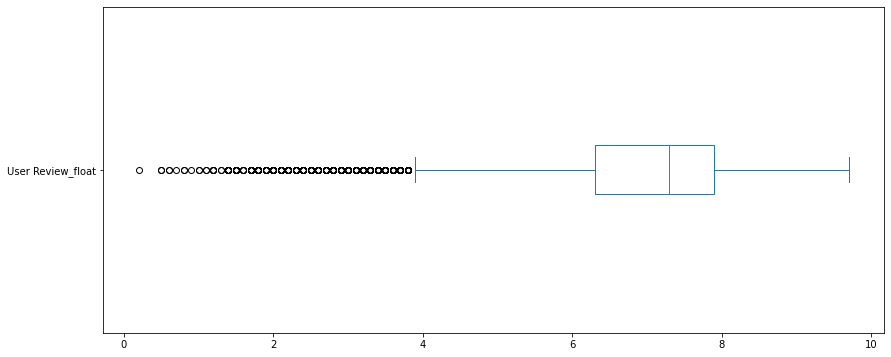

In [372]:
df['User Review_float'].plot(kind='box', vert=False, figsize=(14,6))
df['User Review_float'].describe()

Text(0.5, 0, 'Platform Company')

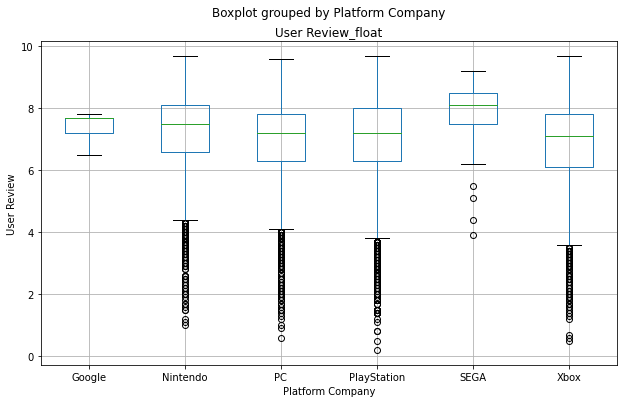

In [393]:
ax = df[['User Review_float', 'Platform Company']].boxplot(by='Platform Company', figsize=(10,6))
ax.set_ylabel('User Review')
ax.set_xlabel('Platform Company')

<AxesSubplot:xlabel='Platform', ylabel='User Review_float'>

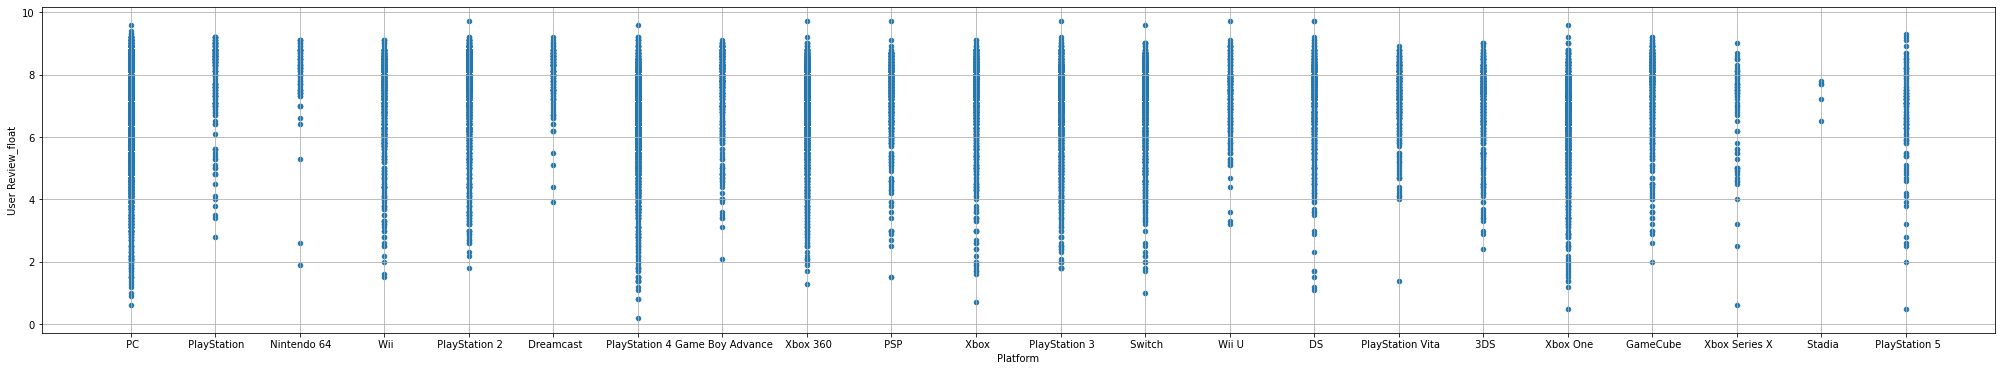

In [390]:
df[['Platform','User Review_float']].plot(kind='scatter', x='Platform', y='User Review_float', figsize=(35,6), grid=True)

In [375]:
rdf.groupby(yr)['User Review_float'].mean()

Release Date Format
1995    8.600000
1996    8.350000
1997    8.460714
1998    8.406977
1999    8.473077
2000    7.588350
2001    7.536907
2002    7.410511
2003    7.546566
2004    7.486207
2005    7.357663
2006    7.258385
2007    7.044811
2008    7.067180
2009    7.041686
2010    7.121800
2011    6.782646
2012    6.819565
2013    6.798810
2014    6.847382
2015    6.823333
2016    6.708686
2017    6.745473
2018    6.714299
2019    6.533778
2020    6.618391
2021    6.773488
Name: User Review_float, dtype: float64

Text(0.5, 0, 'year')

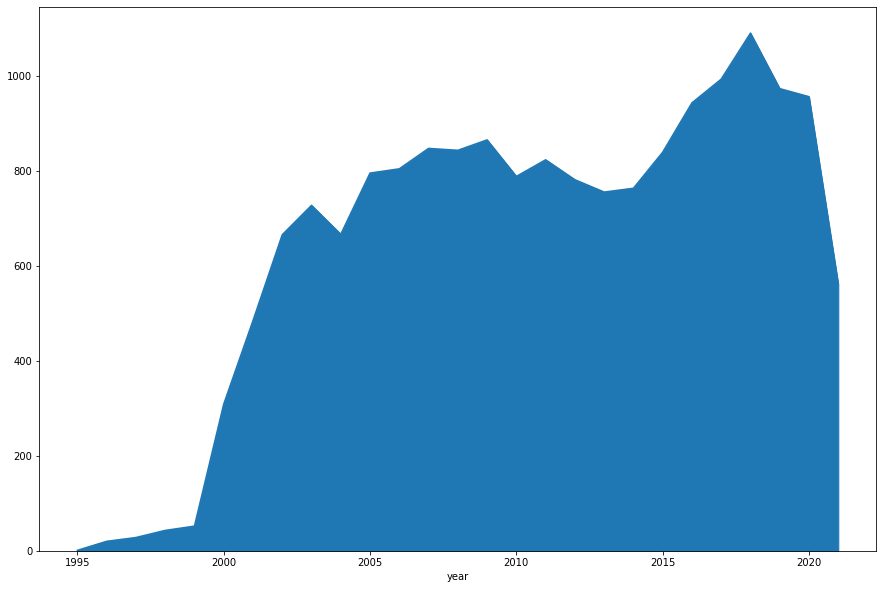

In [420]:
yr = rdf['Release Date Format'].dt.year
yr_userReview = rdf.groupby(yr)['User Review_float'].count().plot(kind='area', figsize=(15,10))
yr_userReview.set_xlabel('year')

In [377]:
year = df['Release Date'].str.split(",", n=1, expand=True)
df['Release Year']=year[1]
month = df['Release Date'].str.split(" ", n=1, expand=True)
df['Release Month']=month[0]

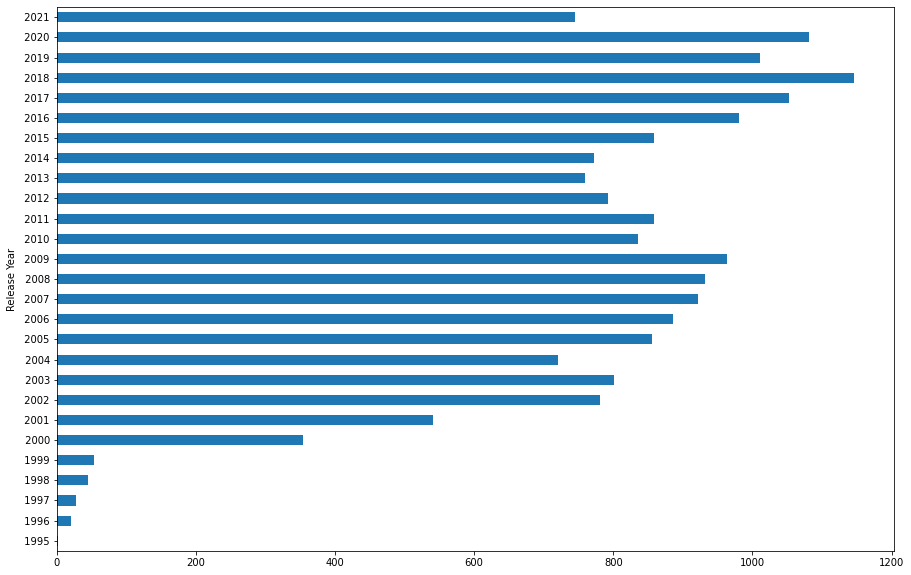

In [422]:
year_values = df.groupby(['Release Year'])['Release Year'].count().plot(kind='barh',figsize=(15,10))

In [379]:
df['Release Date Format']=pd.to_datetime(df['Release Date'])

Text(0, 0.5, 'Month')

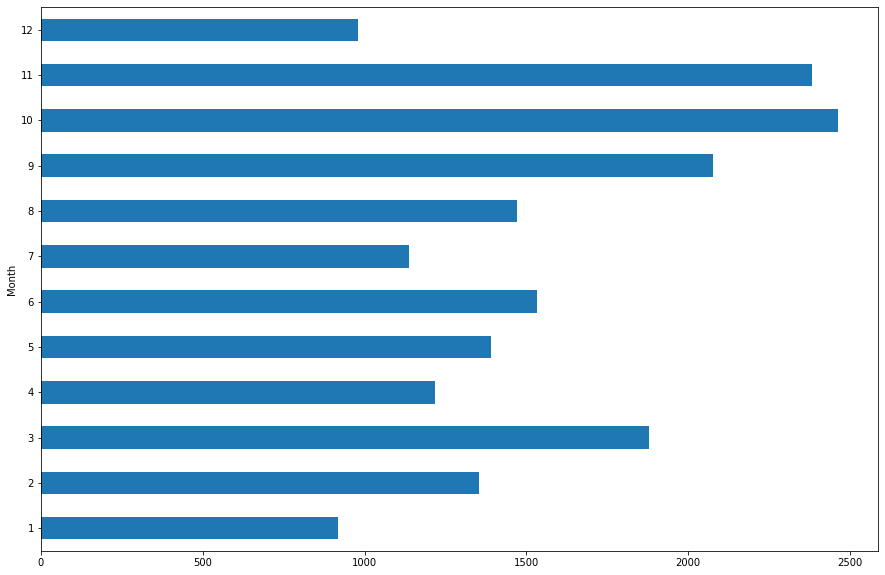

In [424]:
mon = df['Release Date Format'].dt.month
mon
mon_values = df.groupby(mon)['Release Date Format'].count().plot(kind='barh', figsize=(15,10))
mon_values.set_ylabel('Month')